# CORDEX Regional Climate Projections

...

In [11]:
import geopandas as gpd
import xarray as xr

In [3]:
org_units = gpd.read_file('../test_data/sierra-leone-districts.geojson')
org_units

,type,id,name,hasCoordinatesDown,hasCoordinatesUp,level,grandParentParentGraph,grandParentId,parentGraph,parentId,parentName,dimensions,weight,geometry
0,Polygon,O6uvpzGd5pu,Bo,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-11.5914 8.4875, -11.5906 8.4769, -1..."
1,Polygon,fdc6uOvgoji,Bombali,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-11.8091 9.2032, -11.8102 9.1944, -1..."
2,MultiPolygon,lc3eMKXaEfw,Bonthe,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"MULTIPOLYGON (((-12.5568 7.3832, -12.5574 7.38..."
3,Polygon,jUb8gELQApl,Kailahun,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-10.7972 7.5866, -10.8002 7.5878, -1..."
4,MultiPolygon,PMa2VCrupOd,Kambia,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"MULTIPOLYGON (((-13.1349 8.8471, -13.1343 8.84..."
5,Polygon,kJq2mPyFEHo,Kenema,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-11.3596 8.5317, -11.3513 8.5234, -1..."
6,Polygon,qhqAxPSTUXp,Koinadugu,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-10.585 9.0434, -10.5877 9.0432, -10..."
7,Polygon,Vth0fbpFcsO,Kono,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"POLYGON ((-10.585 9.0434, -10.5848 9.0432, -10..."
8,MultiPolygon,jmIPBj66vD6,Moyamba,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"MULTIPOLYGON (((-12.6351 7.6613, -12.6346 7.66..."
9,MultiPolygon,TEQlaapDQoK,Port Loko,True,False,2,,,ImspTQPwCqd,ImspTQPwCqd,Sierra Leone,{},1,"MULTIPOLYGON (((-13.119 8.4718, -13.1174 8.470..."


In [ ]:
# valid variable names
# - "2m_air_temperature",
# - "2m_relative_humidity",
# - "mean_precipitation_flux"

import earthkit.data
import json
from pathlib import Path

def get_daily_cordex_data(start_date, end_date, region, dirname, prefix, variables, scenario, resolution, gcm_model, rcm_model):       
    # construct the query parameters
    params = {
        "domain": region,
        "experiment": scenario,
        "horizontal_resolution": resolution,
        "temporal_resolution": "daily_mean",
        "variable": variables,
        "gcm_model": gcm_model,
        "rcm_model": rcm_model,
        "ensemble_member": "r1i1p1",
        "start_year": [str(start_date)],
        "end_year": [str(end_date)],
    }

    # download the data
    print(f'Downloading climate projection data from CDS API...')
    print(f'Request parameters: \n{json.dumps(params)}')
    data = earthkit.data.from_source("cds",
        "projections-cordex-domains-single-levels",
        **params
    )

    print('Download finished:', data)
    # TODO: Might be better or faster to shutil copy? 
    out_path = Path(dirname) / f'{prefix}_{start_year}-{end_year}.nc'
    data.to_target('file', out_path)

    # return
    return [out_path]

start_year = 2026
end_year = 2030
dirname = '../test_outputs'
prefix = 'test_cordex_temperature'
variables = ['2m_air_temperature']
region = 'africa'
scenario = 'rcp_2_6'
resolution = '0_22_degree_x_0_22_degree'
gcm_model = 'mohc_hadgem2_es'
rcm_model = 'clmcom_kit_cclm5_0_15'
files = get_daily_cordex_data(start_year, end_year, region, dirname, prefix, variables, scenario, resolution, gcm_model, rcm_model)
print(files)

Request parameters: 
{"domain": "africa", "experiment": "rcp_2_6", "horizontal_resolution": "0_22_degree_x_0_22_degree", "temporal_resolution": "daily_mean", "variable": ["2m_air_temperature"], "gcm_model": "mohc_hadgem2_es", "rcm_model": "clmcom_kit_cclm5_0_15", "ensemble_member": "r1i1p1", "start_year": ["2026"], "end_year": ["2030"]}


2026-02-05 15:45:44,271 INFO Request ID is 10b406b0-3fc6-4f8f-97cf-db93bfc9676d
2026-02-05 15:45:44,352 INFO status has been updated to accepted
2026-02-05 15:45:58,498 INFO status has been updated to running
2026-02-05 15:47:00,512 INFO status has been updated to successful


c7f01cc939cff06c5083f0c4d3fa37fc.zip:   0%|          | 0.00/581M [00:00<?, ?B/s]

  0%|          | 0/1 [00:00<?, ?it/s]

File(CACHE:\cds-35f571b3f85715bf7a76b47d29248546fb0f1715694c1cc5a170ff7abdd82dd0.d\tas_AFR-22_MOHC-HadGEM2-ES_rcp26_r1i1p1_CLMcom-KIT-CCLM5-0-15_v1_day_20260101-20301230.nc,NetCDFReader)


In [25]:
# test open with xarray
ds = xr.open_dataset(files[0])
ds

<xarray.Dataset> Size: 1GB
Dimensions:       (time: 1800, rlat: 402, rlon: 388, bnds: 2)
Coordinates:
  * time          (time) object 14kB 2026-01-01 12:00:00 ... 2030-12-30 12:00:00
  * rlat          (rlat) float64 3kB -45.87 -45.65 -45.43 ... 41.91 42.13 42.35
  * rlon          (rlon) float64 3kB -24.75 -24.53 -24.31 ... 59.95 60.17 60.39
    lon           (rlat, rlon) float64 1MB ...
    lat           (rlat, rlon) float64 1MB ...
    height        float64 8B ...
Dimensions without coordinates: bnds
Data variables:
    rotated_pole  |S1 1B ...
    tas           (time, rlat, rlon) float32 1GB ...
    time_bnds     (time, bnds) object 29kB ...
Attributes: (12/26)
    title:                          CCLMcom-KIT-CCLM5-0-15 model output prepa...
    project_id:                     CORDEX
    CORDEX_domain:                  AFR-22
    driving_model_id:               MOHC-HadGEM2-ES
    experiment_id:                  rcp26
    driving_experiment_name:        rcp26
    ...                             ...
    comment:                        Please use the following reference for th...
    product:                        output
    frequency:                      day
    creation_date:                  2019-11-29-T11:14:50Z
    tracking_id:                    hdl:21.14103/8a14ddab-202f-4701-bd53-8f99...
    c3s_disclaimer:                 This data has been curated and prepared i...

In [26]:
# convert to celsius
ds['tas'] = ds.tas - 273.15

Mean temp 2026-06-01 22.625286


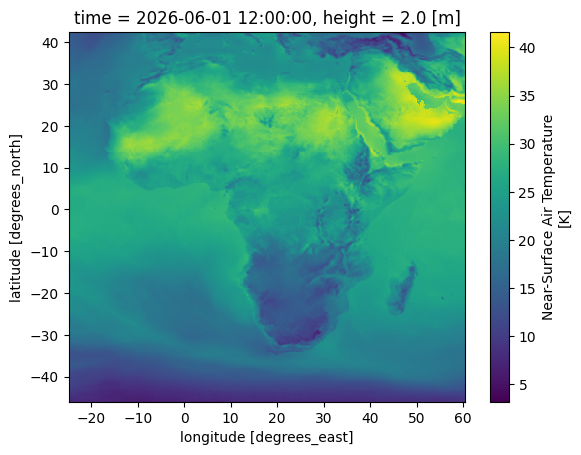

In [46]:
# test plot 2026
date = '2026-06-01'
print('Mean temp', date, ds.tas.sel(time=date).mean().values)
ds.tas.sel(time=date).plot(
    x="lon",
    y="lat"
)

Mean temp 2030-06-01 23.86605


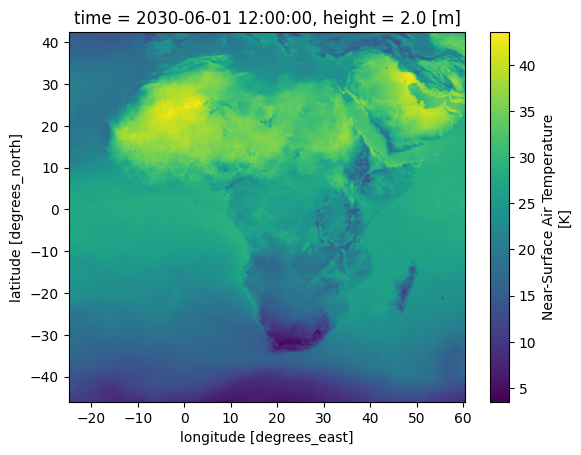

In [47]:
# test plot 2030
date = '2030-06-01'
print('Mean temp', date, ds.tas.sel(time=date).mean().values)
ds.tas.sel(time=date).plot(
    x="lon",
    y="lat"
)

In [39]:
# test subset to bbox
xmin,ymin,xmax,ymax = map(float, org_units.total_bounds)

mask = (
    (ds.lat >= ymin) & (ds.lat <= ymax) &
    (ds.lon >= xmin)  & (ds.lon <= xmax)
)

ds_subset = ds.where(mask, drop=True)
ds_subset.dims

FrozenMappingWarningOnValuesAccess({'rlat': 14, 'rlon': 13, 'time': 1800, 'bnds': 2})

Mean temp 2026-06-01 25.485825


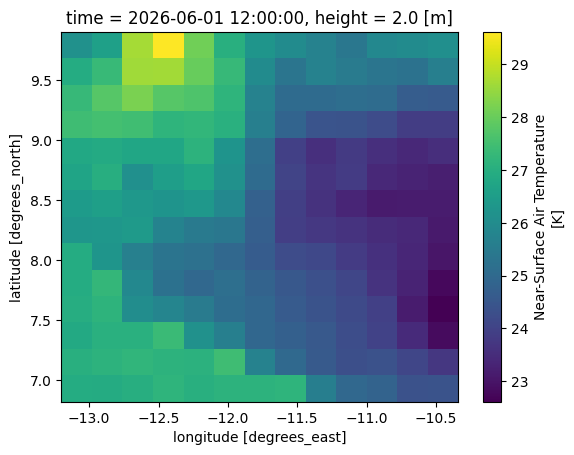

In [48]:
# test plot 2026
date = '2026-06-01'
print('Mean temp', date, ds_subset.tas.sel(time=date).mean().values)
ds_subset.tas.sel(time=date).plot(
    x="lon",
    y="lat"
)

Mean temp 2030-06-01 27.176796


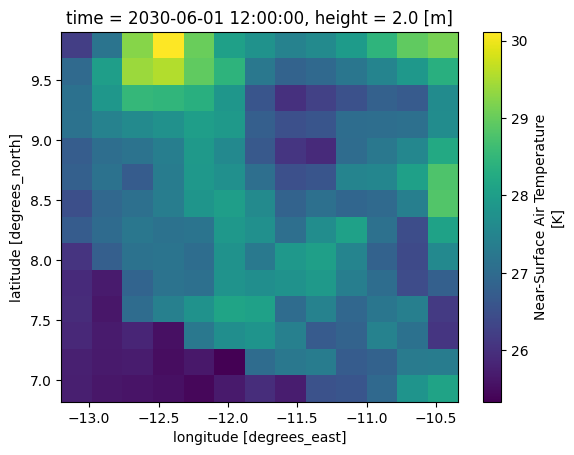

In [49]:
# test plot 2030
date = '2030-06-01'
print('Mean temp', date, ds_subset.tas.sel(time=date).mean().values)
ds_subset.tas.sel(time=date).plot(
    x="lon",
    y="lat"
)